In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv('train.csv')

In [ ]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
image=df.iloc[4,1:]
image.shape

(784,)

In [ ]:
image=image.values.reshape(28,28)

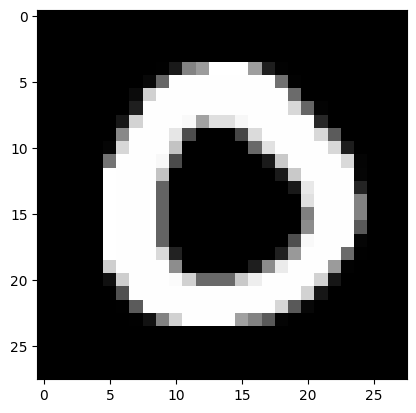

In [ ]:
plt.imshow(image,cmap='gray')

In [ ]:
img=df.iloc[16,1:]
img=img.values.reshape(28,28)

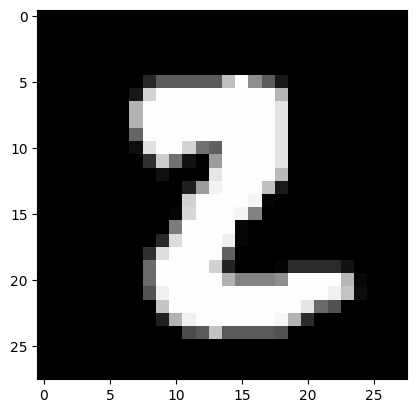

In [ ]:
plt.imshow(img,cmap='gray')

In [ ]:
img=df.iloc[33,1:]
img=img.values.reshape(28,28)

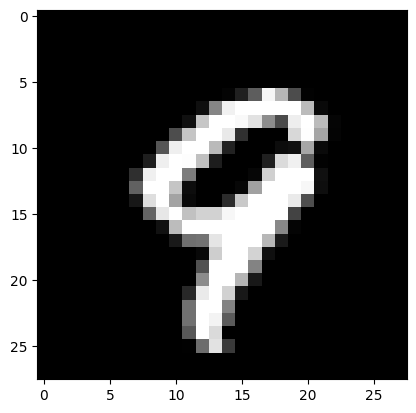

In [ ]:
plt.imshow(img,cmap='gray')

In [ ]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [ ]:
100*df['label'].value_counts()/df.shape[0]

1    11.152381
7    10.478571
3    10.359524
9     9.971429
2     9.945238
6     9.850000
0     9.838095
4     9.695238
8     9.673810
5     9.035714
Name: label, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=df.drop('label',axis=1)
Y=df['label']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.15)

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
from sklearn.svm import SVC
svc=SVC(C=1,kernel='linear')
svc.fit(X_train,Y_train)

SVC(C=1, kernel='linear')

In [ ]:
svc.score(X_test,Y_test)

0.9097478991596639

In [ ]:
Y_pred=svc.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3561
           1       0.94      0.98      0.96      3990
           2       0.89      0.91      0.90      3539
           3       0.88      0.87      0.87      3693
           4       0.87      0.93      0.90      3459
           5       0.89      0.86      0.87      3251
           6       0.96      0.93      0.95      3535
           7       0.92      0.92      0.92      3718
           8       0.90      0.86      0.88      3402
           9       0.91      0.86      0.88      3552

    accuracy                           0.91     35700
   macro avg       0.91      0.91      0.91     35700
weighted avg       0.91      0.91      0.91     35700



In [ ]:
import gc
gc.collect()

243

In [ ]:
svc_rbf=SVC(C=1,kernel='rbf')
svc_rbf.fit(X_train,Y_train)

SVC(C=1)

In [ ]:
svc.score(X_test,Y_test)

0.9097478991596639

In [ ]:
from sklearn.model_selection import GridSearchCV
param={'gamma':[1e-3,1e-2,1e-1],
       'C':[10,100,1000,10000]}
model_cv=GridSearchCV(SVC(kernel='rbf'),param_grid=param,scoring='accuracy',n_jobs=-1,return_train_score=True,cv=3,verbose=1)
model_cv.fit(X_train,Y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [10, 100, 1000, 10000],
                         'gamma': [0.001, 0.01, 0.1]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
result=model_cv.cv_results_
result=pd.DataFrame(result)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,6.771376,0.708083,6.593838,0.511218,10,0.001,"{'C': 10, 'gamma': 0.001}",0.926667,0.930476,0.935714,0.930952,0.003709,1,0.999762,0.999762,0.999286,0.999603,0.000224
1,18.287445,0.360702,13.712852,0.812719,10,0.01,"{'C': 10, 'gamma': 0.01}",0.725238,0.750476,0.728571,0.734762,0.011195,5,1.000000,1.000000,1.000000,1.000000,0.000000
2,18.769375,0.410331,14.996261,0.617448,10,0.1,"{'C': 10, 'gamma': 0.1}",0.175238,0.182381,0.180000,0.179206,0.002970,9,1.000000,1.000000,1.000000,1.000000,0.000000
3,4.428907,0.633143,6.294410,0.380560,100,0.001,"{'C': 100, 'gamma': 0.001}",0.926190,0.928571,0.932857,0.929206,0.002758,2,1.000000,1.000000,1.000000,1.000000,0.000000
4,17.663297,1.143404,13.772414,0.378931,100,0.01,"{'C': 100, 'gamma': 0.01}",0.725238,0.750476,0.728571,0.734762,0.011195,5,1.000000,1.000000,1.000000,1.000000,0.000000
5,18.803499,0.410723,15.923989,0.434705,100,0.1,"{'C': 100, 'gamma': 0.1}",0.175238,0.182381,0.180000,0.179206,0.002970,9,1.000000,1.000000,1.000000,1.000000,0.000000
6,4.367047,0.541553,7.244678,0.868419,1000,0.001,"{'C': 1000, 'gamma': 0.001}",0.926190,0.928571,0.932857,0.929206,0.002758,2,1.000000,1.000000,1.000000,1.000000,0.000000
7,18.755331,0.517595,14.960371,0.983688,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.725238,0.750476,0.728571,0.734762,0.011195,5,1.000000,1.000000,1.000000,1.000000,0.000000
8,20.014568,0.562956,15.416956,0.136729,1000,0.1,"{'C': 1000, 'gamma': 0.1}",0.175238,0.182381,0.180000,0.179206,0.002970,9,1.000000,1.000000,1.000000,1.000000,0.000000
9,4.023022,0.199115,7.931160,0.154965,10000,0.001,"{'C': 10000, 'gamma': 0.001}",0.926190,0.928571,0.932857,0.929206,0.002758,2,1.000000,1.000000,1.000000,1.000000,0.000000


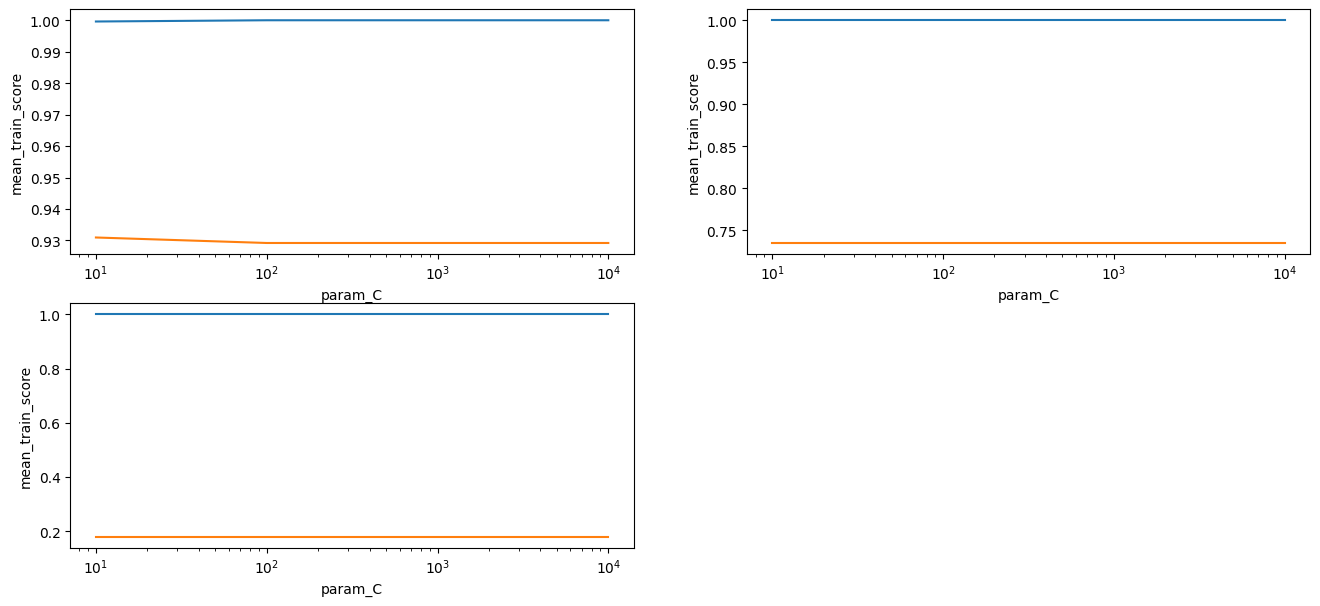

In [ ]:
#result['param_C']=result['param_C'].astype('int')
plt.figure(figsize=(16,7))
plt.subplot(221)
gamma1=result[result['param_gamma']==0.001]
gamma2=result[result['param_gamma']==0.01]
gamma3=result[result['param_gamma']==0.1]
sns.lineplot(y=gamma1['mean_train_score'],x=gamma1['param_C'])
sns.lineplot(y=gamma1['mean_test_score'],x=gamma1['param_C'])
plt.xscale('log')
plt.subplot(222)
sns.lineplot(y=gamma2['mean_train_score'],x=gamma2['param_C'])
sns.lineplot(y=gamma2['mean_test_score'],x=gamma2['param_C'])
plt.xscale('log')
plt.subplot(223)
sns.lineplot(y=gamma3['mean_train_score'],x=gamma3['param_C'])
sns.lineplot(y=gamma3['mean_test_score'],x=gamma3['param_C'])
plt.xscale('log')


In [ ]:
model_cv.best_score_

0.9309523809523809

In [ ]:
svc.score(X_test,Y_test)

0.9097478991596639

In [ ]:
best_params=model_cv.best_params_
best_params

{'C': 10, 'gamma': 0.001}

In [ ]:
best_c=best_params['C']
best_gamma=best_params['gamma']

In [ ]:
svc=SVC(C=best_c,gamma=best_gamma,kernel='rbf')
svc.fit(X_train,Y_train)

SVC(C=10, gamma=0.001)

In [ ]:
svc.score(X_test,Y_test)

0.9411764705882353